In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('/content/Hotel_Reservations.csv')

In [10]:
# Remove 'booking_id' column
df = df.drop('Booking_ID', axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [12]:
# Feature engineering (example: creating a new feature 'total_guests')
df['total_guests'] = df['no_of_adults'] + df['no_of_children']

In [18]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1,2
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1,2
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0,1
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0,2
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0,2


In [13]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

In [15]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9053066850447967
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.91      0.90      7255

[[1984  432]
 [ 255 4584]]


In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8379048931771192
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      2416
           1       0.85      0.92      0.88      4839

    accuracy                           0.84      7255
   macro avg       0.83      0.80      0.81      7255
weighted avg       0.84      0.84      0.83      7255

[[1624  792]
 [ 384 4455]]


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.8379048931771192
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      2416
           1       0.85      0.92      0.88      4839

    accuracy                           0.84      7255
   macro avg       0.83      0.80      0.81      7255
weighted avg       0.84      0.84      0.83      7255

[[1624  792]
 [ 384 4455]]


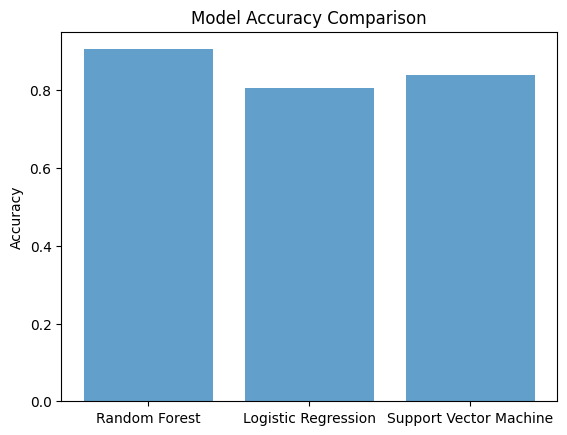

In [22]:
import matplotlib.pyplot as pl
import numpy as np
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
accuracies = [
    accuracy_score(y_test, rf_y_pred),
    accuracy_score(y_test, lr_y_pred),
    accuracy_score(y_test, svm_y_pred)
]

# Create a bar plot
models = ['Random Forest', 'Logistic Regression', 'Support Vector Machine']
y_pos = np.arange(len(models))

plt.bar(y_pos, accuracies, align='center', alpha=0.7)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Show the plot
plt.show()
